# Comparative Analysis of ML Algorithms for Personal Loan Prediction

##### Group 3 Members
* Dai Vinh Quach
* Tenzin Yangzom
* Thi Thu Hien Nguyen
* Wenrui Shan
* Krishna Prasad Tanneeru

## Importing Libraries


In [ ]:
## General Packages
import pandas as pd
import numpy as np
import math
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

## Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Datetime packages
from datetime import datetime
import time

## Preprocessing packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from statsmodels.formula.api import ols
import scipy.stats as stats ## Chi-quare


## SVM
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics

## Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text,plot_tree
from sklearn import tree

## Logistic Regression
from dmba import stepwise_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from mord import LogisticIT
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

## KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import preprocessing

## Neural Network
from sklearn.neural_network import MLPClassifier,MLPRegressor

## Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

## Read the file

In [ ]:
### Read Files
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv').rename({'Personal Loan':'Personal_Loan'},axis=1)
df.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [ ]:
## Checking data structure
df.shape

(5000, 14)

In [ ]:
## Checking missing value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
## Drop unnecessary columns
df.drop(['ID','ZIP Code'],axis='columns', inplace=True)

# Pre-Processing

In [ ]:
### Drop duplicates
df = df.drop_duplicates()
df.shape

(4987, 12)

In [ ]:
## Separate numeric and categorical columns
num_col=['Age','Experience','Income','CCAvg','Mortgage']
cat_col=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

### Category Features

In [ ]:
# Create a function to check the dataframe for columns, data types, unique values, and null values

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
# Call the check function on the dataframe to return a new dataframe containing column information
check(df)

,column,dtypes,nunique,sum_null
0,Age,int64,45,0
1,Experience,int64,47,0
2,Income,int64,162,0
3,Family,int64,4,0
4,CCAvg,float64,108,0
5,Education,int64,3,0
6,Mortgage,int64,347,0
7,Personal_Loan,int64,2,0
8,Securities Account,int64,2,0
9,CD Account,int64,2,0


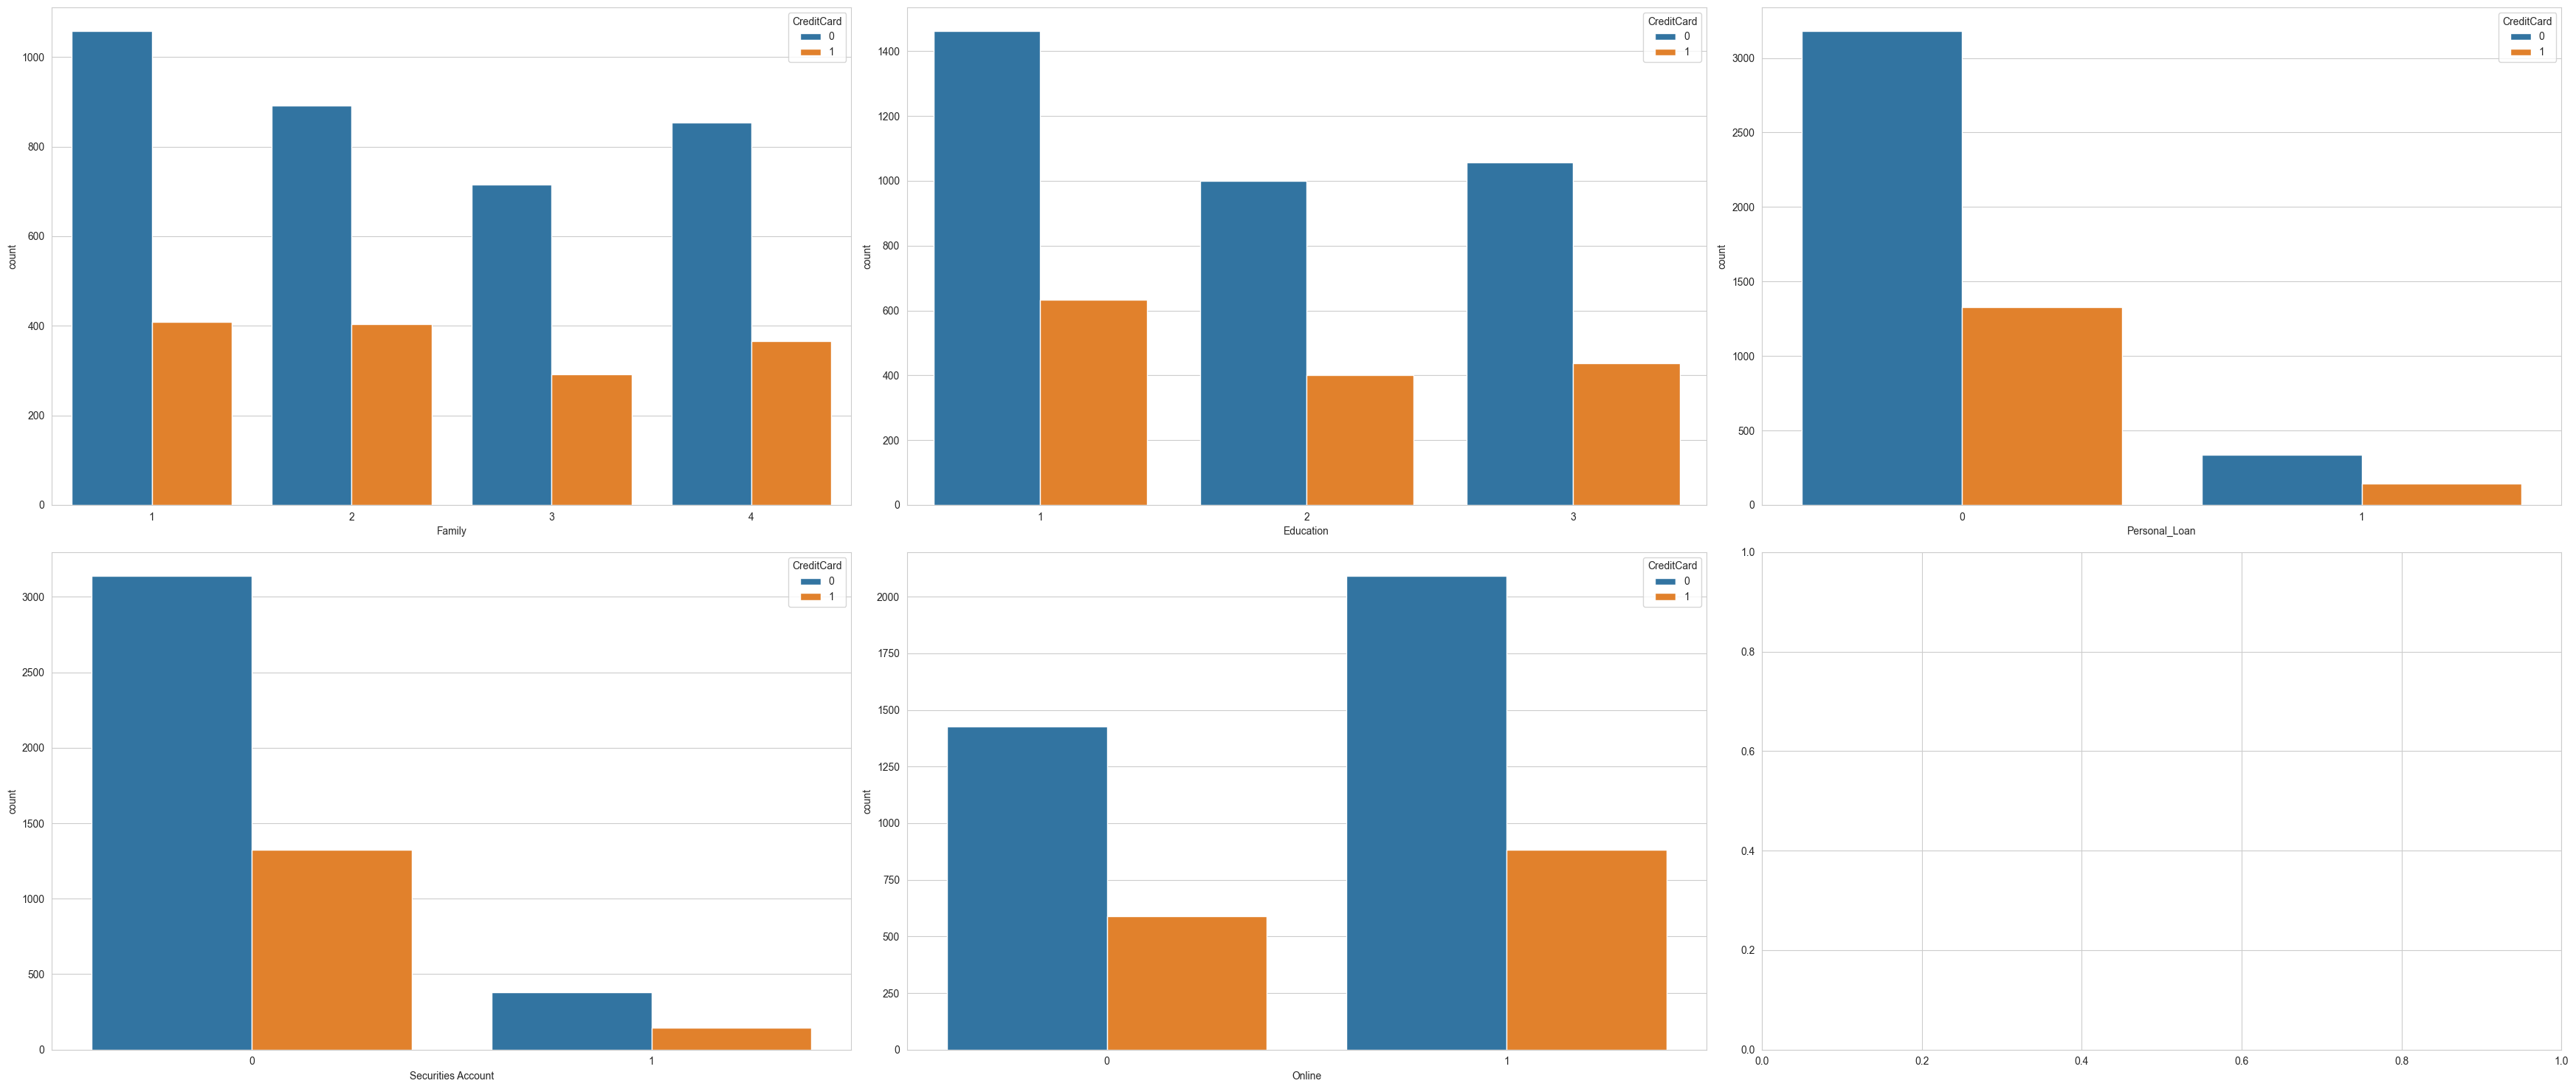

In [ ]:
## Visualize Median price of each category
# matplotlib Version
plt.rcParams["figure.figsize"] = (35, 15)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3)
sns.barplot(x=df[["Family",'CreditCard']].value_counts().to_frame().reset_index()['Family'], y=df[["Family",'CreditCard']].value_counts().to_frame().reset_index()['count'],hue=df[["Family",'CreditCard']].value_counts().to_frame().reset_index()['CreditCard'],ax=axes[0,0])
sns.barplot(x=df[["Education",'CreditCard']].value_counts().to_frame().reset_index()['Education'], y=df[["Education",'CreditCard']].value_counts().to_frame().reset_index()['count'],hue=df[["Education",'CreditCard']].value_counts().to_frame().reset_index()['CreditCard'],ax=axes[0,1])
sns.barplot(x=df[["Personal_Loan",'CreditCard']].value_counts().to_frame().reset_index()['Personal_Loan'], y=df[["Personal_Loan",'CreditCard']].value_counts().to_frame().reset_index()['count'],hue=df[["Personal_Loan",'CreditCard']].value_counts().to_frame().reset_index()['CreditCard'],ax=axes[0,2])
sns.barplot(x=df[["Securities Account",'CreditCard']].value_counts().to_frame().reset_index()['Securities Account'], y=df[["Securities Account",'CreditCard']].value_counts().to_frame().reset_index()['count'],hue=df[["Securities Account",'CreditCard']].value_counts().to_frame().reset_index()['CreditCard'],ax=axes[1,0])
sns.barplot(x=df[["Online",'CreditCard']].value_counts().to_frame().reset_index()['Online'], y=df[["Online",'CreditCard']].value_counts().to_frame().reset_index()['count'],hue=df[["Online",'CreditCard']].value_counts().to_frame().reset_index()['CreditCard'],ax=axes[1,1])

plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plots

### Continuous Features

In [ ]:
### Checkign data distribution
df[['Experience','Income','CCAvg','Mortgage']].describe()

,Experience,Income,CCAvg,Mortgage
count,4987.000000,4987.000000,4987.000000,4987.000000
mean,20.114498,73.824544,1.940630,56.646080
std,11.464902,46.062728,1.748824,101.805341
min,-3.000000,8.000000,0.000000,0.000000
25%,10.000000,39.000000,0.700000,0.000000
50%,20.000000,64.000000,1.500000,0.000000
75%,30.000000,98.000000,2.600000,101.000000
max,43.000000,224.000000,10.000000,635.000000


In [ ]:
### Checkign data distribution
df[['Experience','Income','CCAvg','Mortgage']].describe()

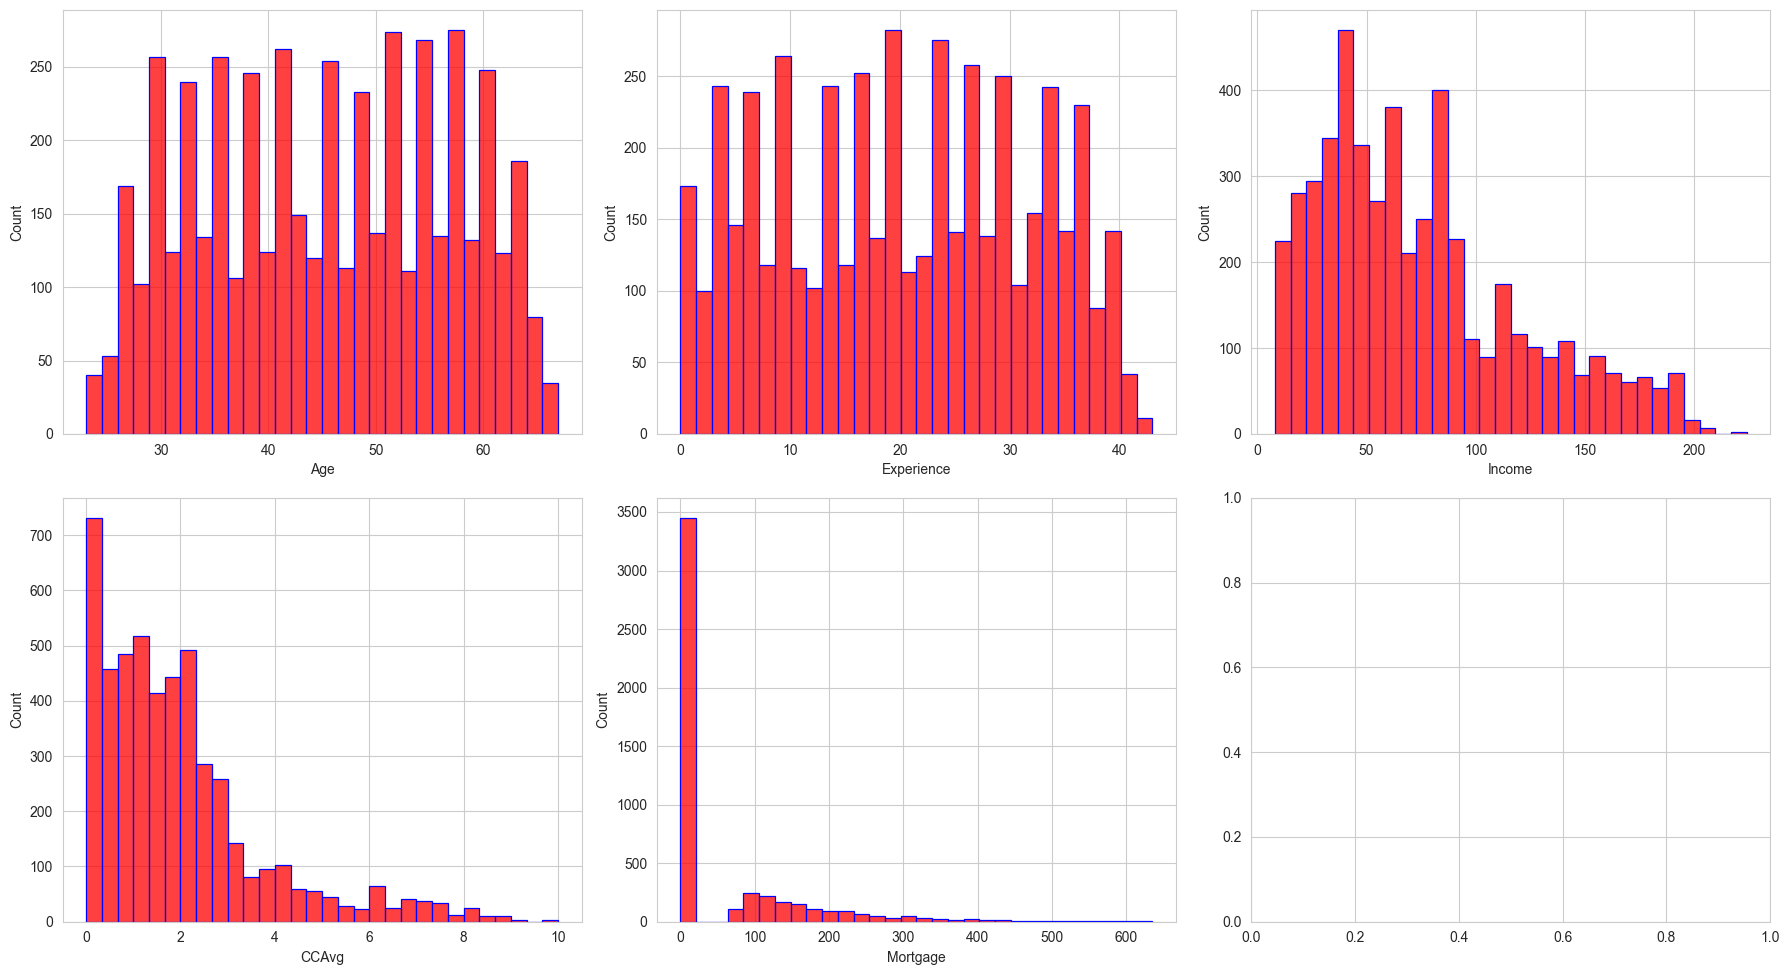

In [ ]:
## Visualize data distribution
# matplotlib Version
plt.rcParams["figure.figsize"] = (18, 10)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3)
sns.histplot(df['Age'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,0])
sns.histplot(df['Experience'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,1])
sns.histplot(df['Income'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,2])
sns.histplot(df['CCAvg'], color ='red', edgecolor='blue', bins = 30,ax=axes[1,0])
sns.histplot(df['Mortgage'], color ='red', edgecolor='blue', bins = 30,ax=axes[1,1])

plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plot


#### PCA

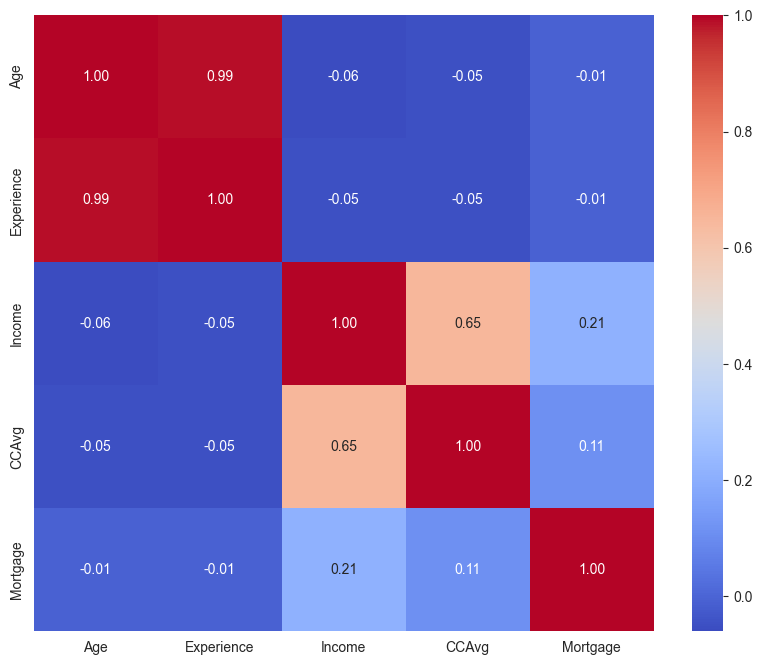

In [ ]:
# Correlation between continuous data
plt.figure(figsize=(10,8))
sns.heatmap(df[num_col].corr().round(2), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
### Standardlize data
df_normalize = df[['Age','Experience','Income','CCAvg']]
sc = StandardScaler()
sc.fit(df_normalize)
scaled_data = sc.transform(df_normalize)

In [ ]:
# Applying PCA function
pca = PCA(n_components=2) ### we are trying to keep at least 95% of the variance of the original variables
x_pca = pca.fit_transform(scaled_data) ## Fit and transform the data
x_pca.shape ## Checking data dimensions

(4987, 2)

In [ ]:
## Print out the variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.50569645, 0.40432356])

In [ ]:
### Create Data Frame for the new dimensions datas
df_final = pd.DataFrame(x_pca)
df_final.columns = ['PCA1','PCA2']
df_final.rename({'PCA1':'Age_Experience','PCA2':'Spending_on_income'})

,PCA1,PCA2
0,-2.215218,-1.150448
1,0.121713,-0.785688
2,-0.326049,-1.485166
3,-1.469982,0.328969
4,-1.121395,-1.164132
...,...,...
4982,-1.853088,-1.068230
4983,-1.470180,-1.989903
4984,2.556639,-0.774891
4985,2.611305,-0.277890


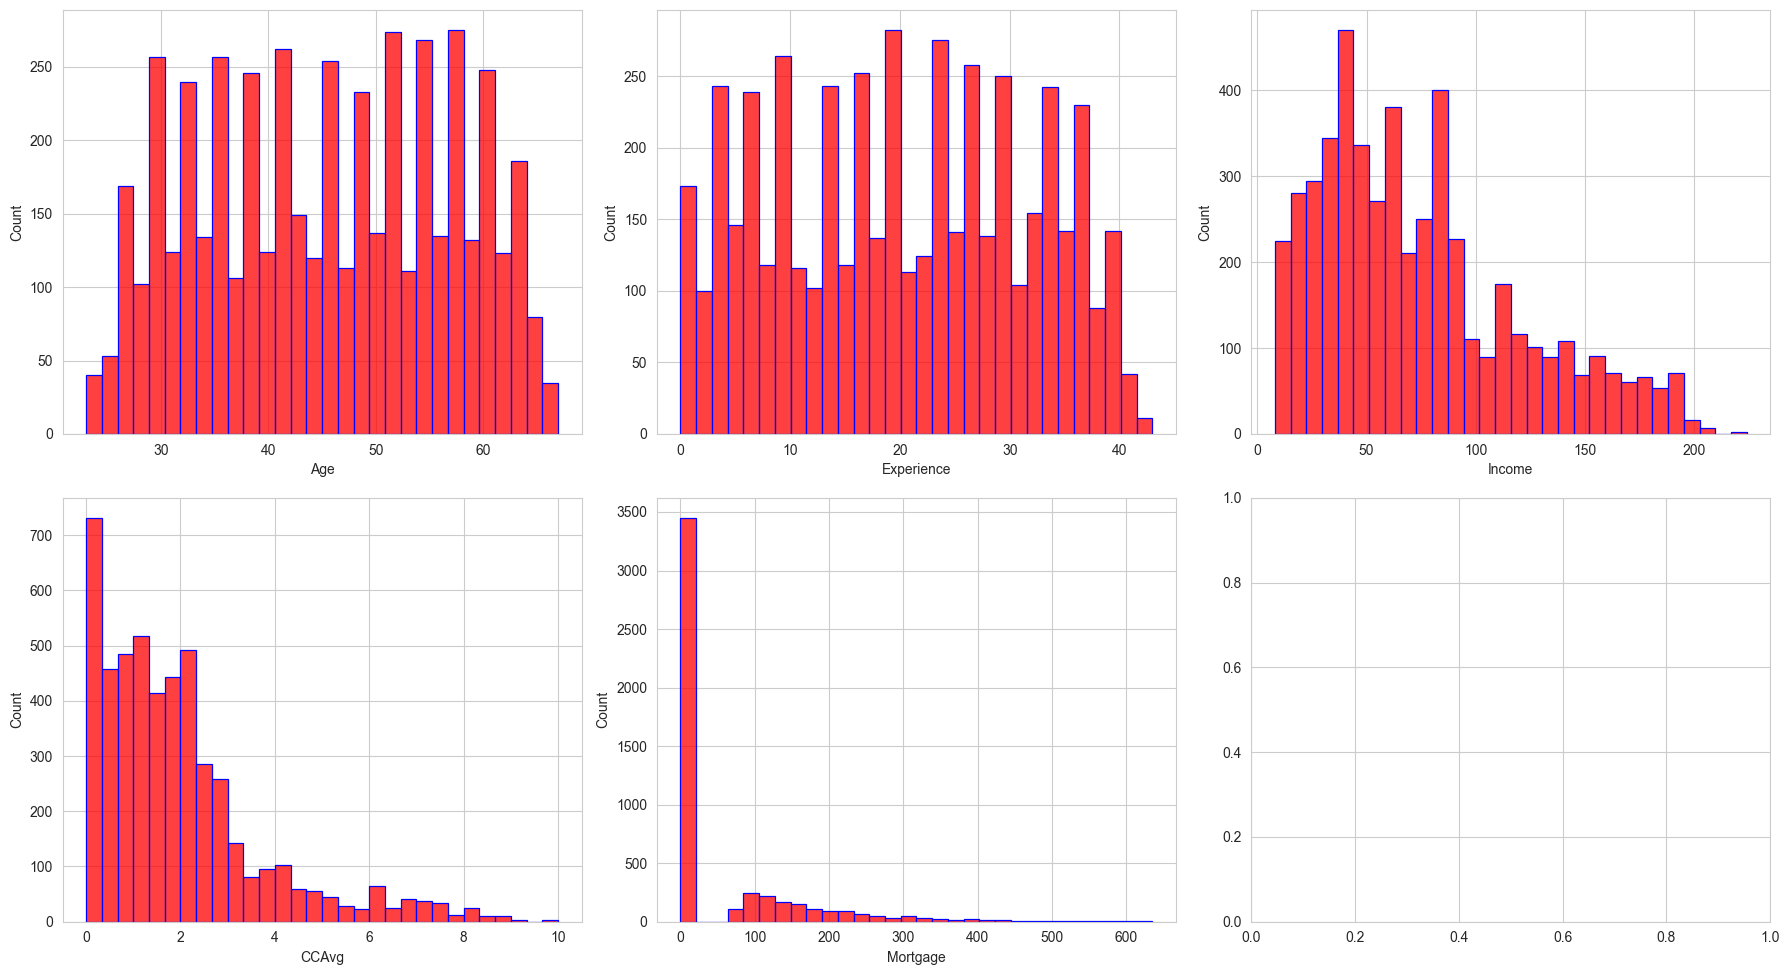

In [ ]:
## Visualize data distribution
# matplotlib Version
plt.rcParams["figure.figsize"] = (18, 10)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3)
sns.histplot(df['Age'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,0])
sns.histplot(df['Experience'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,1])
sns.histplot(df['Income'], color ='red', edgecolor='blue', bins = 30,ax=axes[0,2])
sns.histplot(df['CCAvg'], color ='red', edgecolor='blue', bins = 30,ax=axes[1,0])
sns.histplot(df['Mortgage'], color ='red', edgecolor='blue', bins = 30,ax=axes[1,1])

plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plot


In [ ]:
### Data finalized for models below
df_after_preprocessing = pd.merge(df,df_final,left_index=True, right_index=True,how='inner')
# df_after_preprocessing.to_csv('data_preprocessing.csv')

#### Feature Engineering

In [ ]:
pvalue_ols = []
for i in ['Age', 'Experience', 'Income', 'CCAvg',
       'Mortgage', 'PCA1', 'PCA2']:
    mod = ols('Personal_Loan~ %s'%(i), data = df_after_preprocessing).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(i,aov_table['PR(>F)'][0])
    pvalue_ols.append(aov_table['PR(>F)'][0])

Age 0.56521149445317
Experience 0.536482539825464
Income 1.157042e-317
CCAvg 1.9145020357242052e-158
Mortgage 9.325906826918268e-24
PCA1 0.44922871689639166
PCA2 2.6879063330132332e-11


In [ ]:
df_cate = df_after_preprocessing[['Family','Education', 'Securities Account', 'CD Account',
       'Online', 'CreditCard','Personal_Loan']]
# contigency table in python with pandas
for i in df_cate.columns.tolist():
    print(i)
    compare = pd.crosstab(df_cate['Personal_Loan'],df_cate[i])
    chi2, p, dof, ex = stats.chi2_contingency(compare)
    print(f'p value {p}')

Family
p value 1.4728137534523784e-06
Education
p value 3.8089290626234033e-25
Securities Account
p value 0.15275883250012348
CD Account
p value 4.255646678082027e-109
Online
p value 0.6687450969641101
CreditCard
p value 0.9056743093894611
Personal_Loan
p value 0.0


# Models without standardized data

In [ ]:
### Pre-prepare results from the models
recall_list = []
accuracy_list = []

### Train Test split

In [ ]:
## Select predictors columns and outcome
predictors = ['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'PCA2']
outcome = 'Personal_Loan'

In [ ]:
## Partition data into predictors (x) and output (y)
X = df_after_preprocessing[predictors]
y= df_after_preprocessing[outcome]

In [ ]:
## Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

### Visualize the proportion between class 1 and class 0

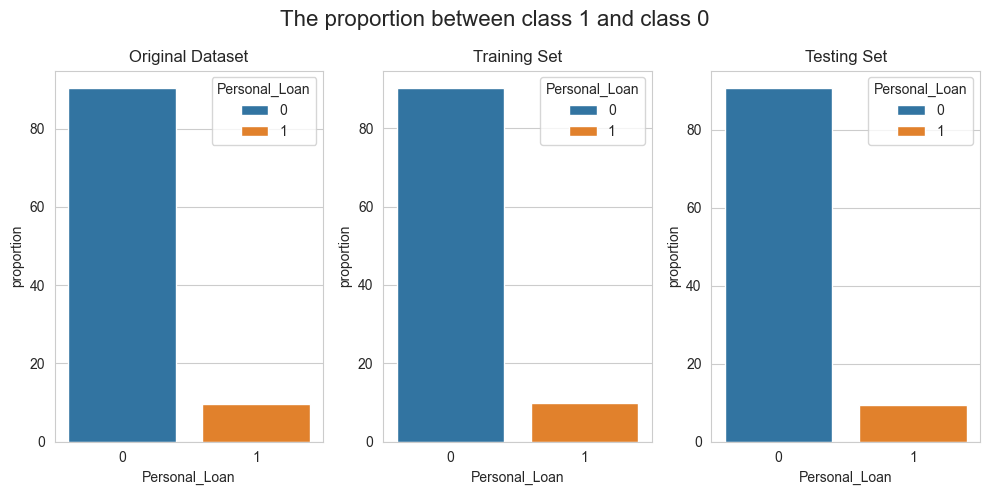

In [ ]:
# matplotlib Version
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 1, ncols = 3)

ax1 = sns.barplot(x=(df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'], ax=axes[0])
ax2 = sns.barplot(x=(train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],ax=axes[1])
ax3 = sns.barplot(x=(valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'], ax=axes[2])

ax1.title.set_text('Original Dataset')
ax2.title.set_text('Training Set')
ax3.title.set_text('Testing Set')

# Add a general title
fig.suptitle('The proportion between class 1 and class 0', fontsize=16)

plt.tight_layout()

## Neural Network

## Note:
* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

#### Neural Network model with 4 hidden nodes

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), random_state=1,
              solver='lbfgs')

#### Performace Evaluation

In [ ]:
## Predict Y
prediction_Neural_Network_4Nodes = clf.predict(valid_X)

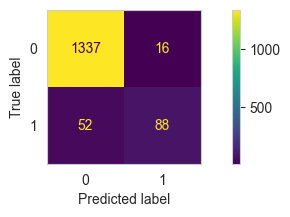

In [ ]:
### Confusion matrix for Neural Network
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_Neural_Network_4Nodes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## NN Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_Neural_Network_4Nodes))


Final Model Evaluation:
Accuracy:  0.95
Recall:  0.63
Precision:  0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1353
           1       0.85      0.63      0.72       140

    accuracy                           0.95      1493
   macro avg       0.90      0.81      0.85      1493
weighted avg       0.95      0.95      0.95      1493



#### Neural Network model with 7 hidden nodes

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(7,), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=(7,), random_state=1,
              solver='lbfgs')

#### Performace Evaluation

In [ ]:
## Predict Y
prediction_Neural_Network_7Nodes = clf.predict(valid_X)

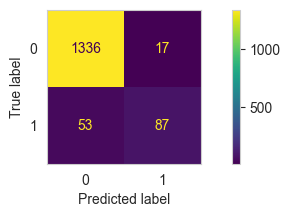

In [ ]:
### Confusion matrix for Neural Network
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_Neural_Network_7Nodes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## NN Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_Neural_Network_7Nodes))



Final Model Evaluation:
Accuracy:  0.95
Recall:  0.62
Precision:  0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.84      0.62      0.71       140

    accuracy                           0.95      1493
   macro avg       0.90      0.80      0.84      1493
weighted avg       0.95      0.95      0.95      1493



#### Both NN models(4 nodes and 7 nodes) have 95% accuracy, but the NN(4 nodes) model shows slightly better recall (0.63 vs. 0.62). Since recall is critical for capturing positive cases, we will use the model the higher recall (NN model with 4 nodes).

In [ ]:
### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, prediction_Neural_Network_4Nodes),2))
recall_list.append(round(metrics.recall_score(valid_y, prediction_Neural_Network_4Nodes),2))

### SVM

In [ ]:
### Implement model
kernel_scores = {}

# Evaluate each kernel
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(kernel=kernel)
    scores = cross_val_score(model, train_X, train_y, cv=5)
    mean_score = scores.mean()
    kernel_scores[kernel] = mean_score
    print(f"{kernel} kernel: Mean Accuracy = {mean_score:.4f}")

linear kernel: Mean Accuracy = 0.9448
rbf kernel: Mean Accuracy = 0.9075
poly kernel: Mean Accuracy = 0.9132
sigmoid kernel: Mean Accuracy = 0.8725


In [ ]:
### Implement with the best kernel
best_kernel = max(kernel_scores, key=kernel_scores.get)
classifier_svm = SVC(kernel=best_kernel)
classifier_svm.fit(train_X, train_y)

SVC(kernel='linear')

#### Performace Evaluation

In [ ]:
### Implement SVM prediction
prediction_SVM = classifier_svm.predict(valid_X)

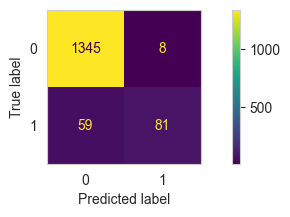

In [ ]:
### Confusion matrix for SVM
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_SVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## SVM Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_SVM),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_SVM),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_SVM),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_SVM))

### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, prediction_SVM),2))
recall_list.append(round(metrics.recall_score(valid_y, prediction_SVM),2))


Final Model Evaluation:
Accuracy:  0.96
Recall:  0.58
Precision:  0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1353
           1       0.91      0.58      0.71       140

    accuracy                           0.96      1493
   macro avg       0.93      0.79      0.84      1493
weighted avg       0.95      0.96      0.95      1493



#### The SVM model demonstrates high accuracy (96%) and precision (92%), indicating strong overall performance. However, the recall for the positive class is lower at 60%, suggesting the model may miss some positive cases.

### Decision Tree

In [ ]:
### Finding the best max depth
def DecisionTreelassiferMultiple(max_depth,train_X, valid_X, train_y, valid_y):
    results_all = []
    for i in range(1,max_depth):
        tree_classifer = DecisionTreeClassifier(max_depth=i, random_state=42)
        tree_classifer.fit(train_X, train_y)

        y_pred_test = tree_classifer.predict(valid_X)
        Accuracy_test = round(metrics.accuracy_score(valid_y, y_pred_test),4)
        Recall_test = round(metrics.recall_score(valid_y, y_pred_test),4)
        Precision_test =  round(metrics.precision_score(valid_y, y_pred_test),4)

        Results = [i,"test",Accuracy_test,Recall_test,Precision_test]
        results_all.append(Results)
    return results_all

In [ ]:
## Implement multiple linear regression
mutitple_models = DecisionTreelassiferMultiple(20,train_X, valid_X, train_y, valid_y)

In [ ]:
## Results of multiple decision tree regression
final_result = pd.DataFrame(mutitple_models, columns = ["Max_Depth","Type","Accuracy","Recall","Precision"])
final_result

,Max_Depth,Type,Accuracy,Recall,Precision
0,1,test,0.9062,0.0000,0.0000
1,2,test,0.9612,0.7000,0.8596
2,3,test,0.9826,0.8357,0.9750
3,4,test,0.9846,0.8500,0.9835
4,5,test,0.9853,0.9071,0.9338
5,6,test,0.9846,0.9000,0.9333
6,7,test,0.9812,0.9071,0.8944
7,8,test,0.9799,0.8857,0.8986
8,9,test,0.9806,0.8857,0.9051
9,10,test,0.9799,0.9000,0.8873


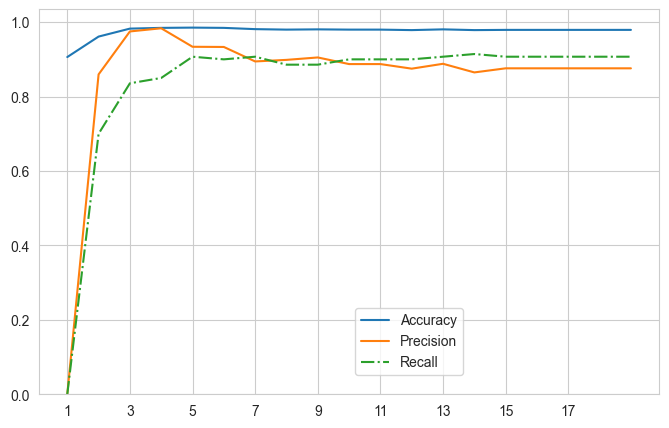

In [ ]:
# Visualize the result by line chart
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(final_result["Max_Depth"], final_result["Accuracy"], label = "Accuracy")
plt.plot(final_result["Max_Depth"], final_result["Precision"], label = "Precision",linestyle="-")
plt.plot(final_result["Max_Depth"], final_result["Recall"], label = "Recall",linestyle="-.")
plt.legend(loc=(0.51, 0.05)) ## Modify the position of legend
plt.xticks(np.arange(1, 19,2))
plt.ylim(0)
plt.show()

In [ ]:
### Best K is found equal to 5
classTree = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=15, min_samples_split=15)
classTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=15,
                       random_state=0)

#### Performace Evaluation

In [ ]:
#Predict the response for test dataset
y_pred_DT = classTree.predict(valid_X)

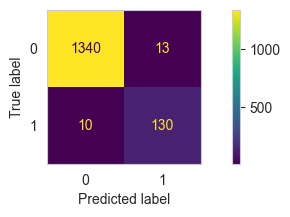

In [ ]:
### Confusion matrix for Decision Tree
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_DT)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Decision tree Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_DT),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_DT),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_DT),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_DT))

### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, y_pred_DT),2))
recall_list.append(round(metrics.recall_score(valid_y, y_pred_DT),2))


Final Model Evaluation:
Accuracy:  0.98
Recall:  0.93
Precision:  0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.91      0.93      0.92       140

    accuracy                           0.98      1493
   macro avg       0.95      0.96      0.96      1493
weighted avg       0.98      0.98      0.98      1493



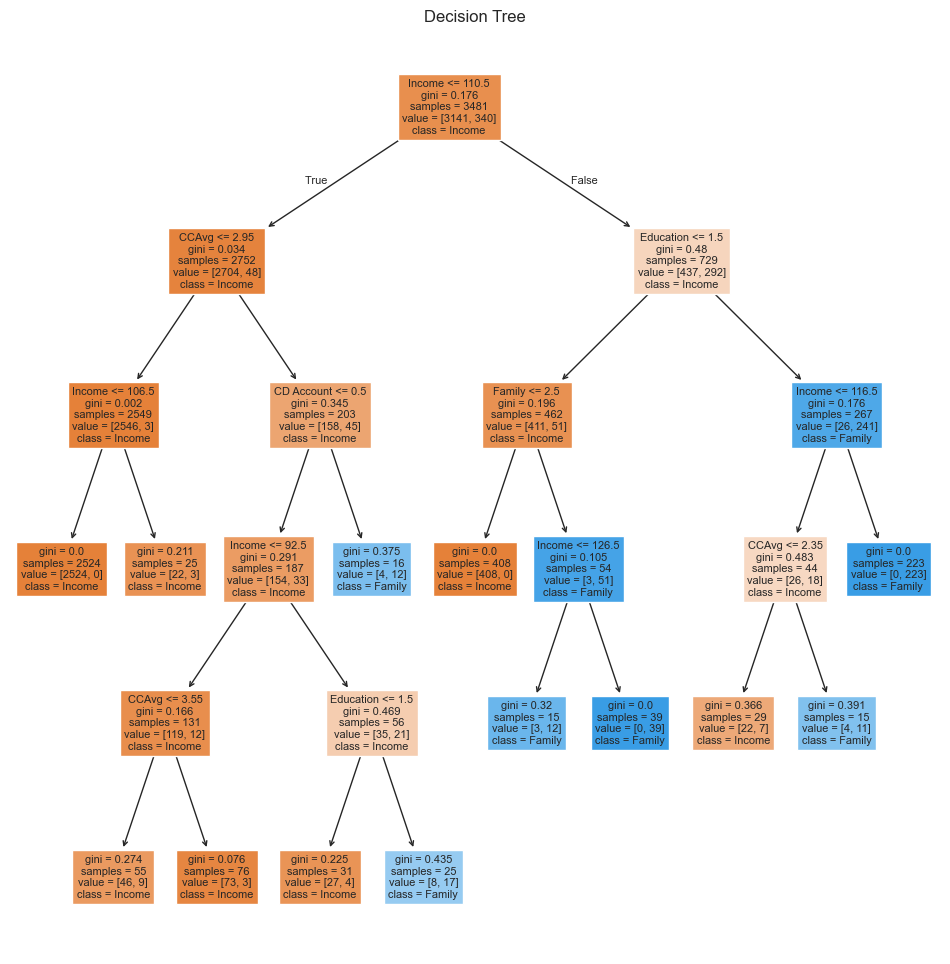

In [ ]:
## Showing Tree Structure
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(classTree,feature_names=predictors, class_names=X.columns, filled=True)
plt.title('Decision Tree')
plt.show()

#### The decision tree model exhibits excellent performance with high accuracy and balanced precision and recall. It effectively identifies both classes, with minimal false positives and false negatives, indicating robust classification capabilities.

### Logistic Regression

#### - with all predictors

In [ ]:
## Original models with all predictors
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -13.167792029246181
         Income    Family     CCAvg  Education  Mortgage  CD Account      PCA2
coeff  0.053122  0.677552  0.069334   1.551095  0.000496    2.400583 -0.021452

AIC -271.6414208858878


#### Performace Evaluation

In [ ]:
## Applied all_predictors model to predict
y_pred_logistics = logit_reg.predict(valid_X)

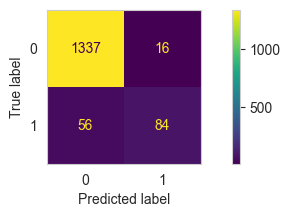

In [ ]:
### Confusion matrix for Logistic Regression full models
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_logistics)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## full Logistic Model result
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_logistics),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_logistics),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_logistics),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_logistics))


Final Model Evaluation:
Accuracy:  0.95
Recall:  0.6
Precision:  0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.84      0.60      0.70       140

    accuracy                           0.95      1493
   macro avg       0.90      0.79      0.84      1493
weighted avg       0.95      0.95      0.95      1493



#### -with gridsearch

In [ ]:
## Apply gridsearch to find the best hyperparameter for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],             # ElasticNet also works with saga solver
    'C': [0.01, 0.1, 1, 10, 100, 1e42],   # Inverse of regularization strength
    'solver': ['liblinear', 'saga']      # Solver must be compatible with penalty
}

In [ ]:
## Applied grid_Search to find the best hyperparameter
logit = LogisticRegression(max_iter=1000)

grid = GridSearchCV(logit, param_grid, cv=5, scoring='recall')
grid.fit(train_X, train_y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.5911764705882353


In [ ]:
# fit a logistic regression with new set of model and best set of hyperparameter
logit_reg_news_best = LogisticRegression(penalty=grid.best_params_["penalty"], C= grid.best_params_["C"], solver=grid.best_params_["solver"])
logit_reg_news_best.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -13.167792029246181
         Income    Family     CCAvg  Education  Mortgage  CD Account      PCA2
coeff  0.053122  0.677552  0.069334   1.551095  0.000496    2.400583 -0.021452
AIC -271.6414208858878


#### Performace Evaluation

In [ ]:
## Applied all_predictors model to predict
y_pred_logistics_best = logit_reg_news_best.predict(valid_X)

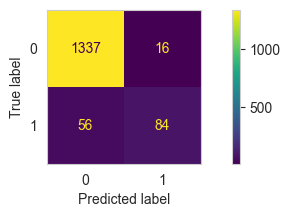

In [ ]:
### Confusion matrix for Logistic Regression full models
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_logistics_best)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Decision tree Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_logistics_best),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_logistics_best),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_logistics_best),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_logistics_best))

### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, y_pred_logistics_best),2))
recall_list.append(round(metrics.recall_score(valid_y, y_pred_logistics_best),2))


Final Model Evaluation:
Accuracy:  0.95
Recall:  0.6
Precision:  0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.84      0.60      0.70       140

    accuracy                           0.95      1493
   macro avg       0.90      0.79      0.84      1493
weighted avg       0.95      0.95      0.95      1493



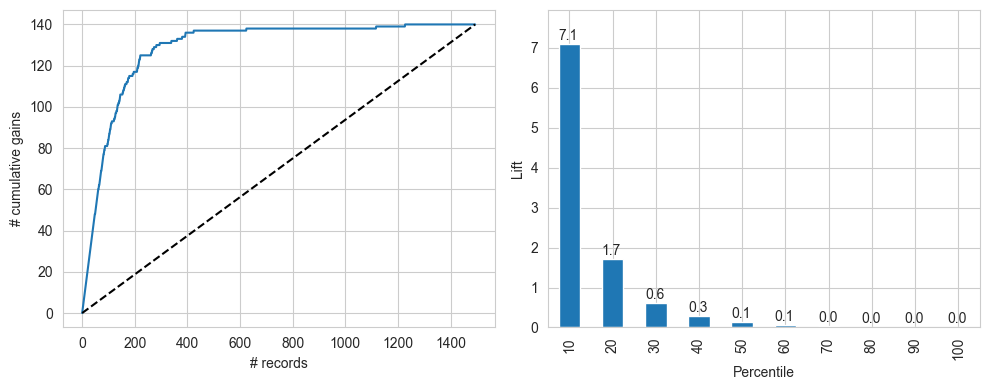

In [ ]:
logit_reg_pred = logit_reg_news_best.predict(valid_X)
logit_reg_proba = logit_reg_news_best.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

df_logit_result = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df_logit_result.actual, ax=axes[0])
liftChart(df_logit_result['p(1)'], title=False, ax=axes[1])

plt.tight_layout()
plt.show()

#### Cumulative Gains Chart:
* The steep rise indicates the model effectively captures a high proportion of positive cases early, outperforming random selection.

#### Lift Chart:
* The highest lift of 7.3 in the top 10th percentile shows the model's strong effectiveness in identifying positive cases in this segment.

### Naive Bayes

In [ ]:
### Normalization (scaling data to the range of 0 to 1)
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(valid_X)

In [ ]:
## Implement model
mnb_model = MultinomialNB()
mnb_model.fit(train_X_scaled, train_y)

MultinomialNB()

#### Performace Evaluation

In [ ]:
## Implement Naive Models
pred_y_NB = mnb_model.predict(test_X_scaled)
prob_y_NB = mnb_model.predict_proba(test_X_scaled)[:, 1]

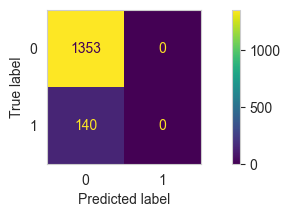

In [ ]:
## Confusion Matrix for Naive bayes
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, pred_y_NB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Naive Bayes Model results
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, pred_y_NB),2))
print('Recall: ', round(metrics.recall_score(valid_y, pred_y_NB),2))
print('Precision: ', round(metrics.precision_score(valid_y, pred_y_NB),2))
print('\nClassification Report:\n', classification_report(valid_y, pred_y_NB))

### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, pred_y_NB),2))
recall_list.append(round(metrics.recall_score(valid_y, pred_y_NB),2))


Final Model Evaluation:
Accuracy:  0.91
Recall:  0.0
Precision:  0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1353
           1       0.00      0.00      0.00       140

    accuracy                           0.91      1493
   macro avg       0.45      0.50      0.48      1493
weighted avg       0.82      0.91      0.86      1493



#### The model achieves high accuracy (91%) due to perfect negative class predictions but has extremely low recall (0.01) for the positive class, indicating it rarely identifies positive cases.

### KNN

#### Train Test split testing

In [ ]:
# Train a classifier for different values of k
# Best k = 5
results_KNN = []
for k in range(1, 30,2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results_KNN.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

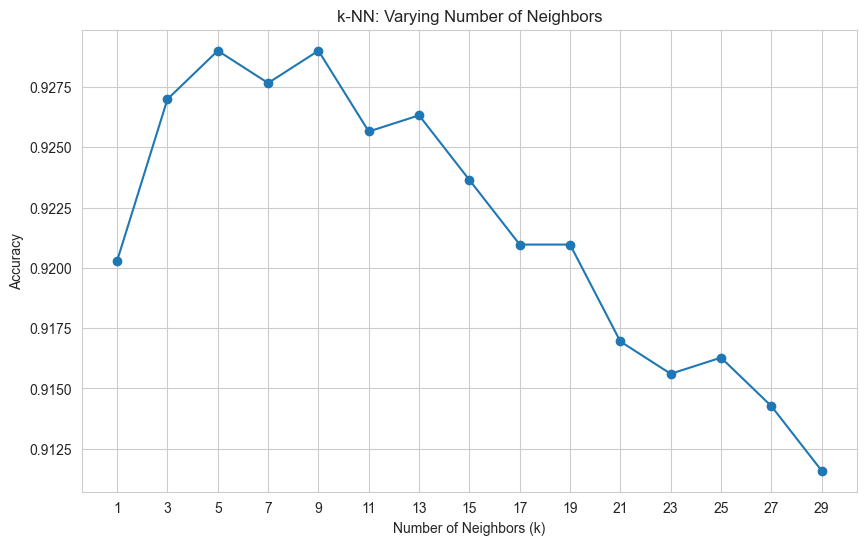

In [ ]:
# Convert results to a pandas data frame
results_KNN = pd.DataFrame(results_KNN)

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_KNN['k'], results_KNN['accuracy'], marker='o')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 30,2))
plt.grid(True)
plt.show()

#### Running models with best K

In [ ]:
# Select k = 5 due to its high accuracy
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(train_X, train_y)

KNeighborsClassifier()

#### Performace Evaluation

In [ ]:
## Apply the best model to predict X
y_pred_KNN = knn_best.predict(valid_X)

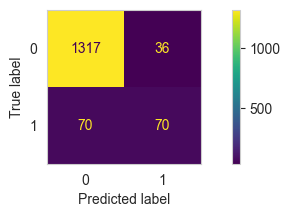

In [ ]:
## Confusion Matrix for Naive bayes
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Naive Bayes Model results
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_KNN),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_KNN),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_KNN),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_KNN))

### Save result
accuracy_list.append(round(metrics.accuracy_score(valid_y, y_pred_KNN),2))
recall_list.append(round(metrics.recall_score(valid_y, y_pred_KNN),2))


Final Model Evaluation:
Accuracy:  0.93
Recall:  0.5
Precision:  0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1353
           1       0.66      0.50      0.57       140

    accuracy                           0.93      1493
   macro avg       0.80      0.74      0.77      1493
weighted avg       0.92      0.93      0.92      1493



#### The KNN model achieves high accuracy (91%) with strong performance on the negative class but struggles with the positive class, showing low precision (0.51) and recall (0.31).

# Models with standardized data

In [ ]:
### Pre-prepare results from the models
recall_list_normalize= []
accuracy_list_normalize = []

### Train Test split

In [ ]:
### Standardize data
scaler = preprocessing.StandardScaler()
X_1 = scaler.fit_transform(X)
X_1 = pd.DataFrame(X_1)
X_1.columns = X.columns

In [ ]:
## Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X_1, y, test_size=0.3, random_state=1)

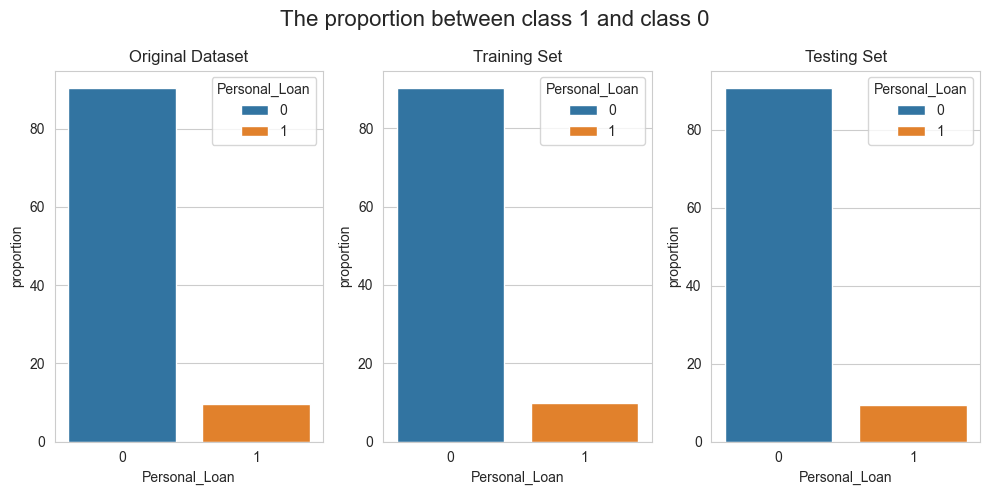

In [ ]:
## Visualize Median price of each category
# matplotlib Version
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 1, ncols = 3)

ax1 = sns.barplot(x=(df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (df_after_preprocessing["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'], ax=axes[0])
ax2 = sns.barplot(x=(train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (train_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],ax=axes[1])
ax3 = sns.barplot(x=(valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'],
            y=(valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['proportion'],
            hue = (valid_y.to_frame()["Personal_Loan"].value_counts(normalize=True) * 100).to_frame().reset_index()['Personal_Loan'], ax=axes[2])

ax1.title.set_text('Original Dataset')
ax2.title.set_text('Training Set')
ax3.title.set_text('Testing Set')

# Add a general title
fig.suptitle('The proportion between class 1 and class 0', fontsize=16)

plt.tight_layout() #Increase the separation between the plots

### Neural Network

In [ ]:
accuracy_list_nn = []
recall_list_nn = []

#### Neural Network model with 4 hidden nodes

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), random_state=1,
              solver='lbfgs')

#### Performace Evaluation

In [ ]:
## Predict Y
prediction_Neural_Network_4Nodes = clf.predict(valid_X)

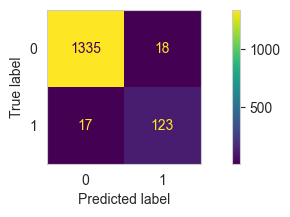

In [ ]:
### Confusion matrix for Neural Network
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_Neural_Network_4Nodes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## NN Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_Neural_Network_4Nodes),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_Neural_Network_4Nodes))

### Save result
accuracy_list_nn.append(round(metrics.accuracy_score(valid_y, prediction_Neural_Network_4Nodes),2))
recall_list_nn.append(round(metrics.recall_score(valid_y, prediction_Neural_Network_4Nodes),2))


Final Model Evaluation:
Accuracy:  0.98
Recall:  0.88
Precision:  0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.87      0.88      0.88       140

    accuracy                           0.98      1493
   macro avg       0.93      0.93      0.93      1493
weighted avg       0.98      0.98      0.98      1493



#### Neural Network model with 7 hidden nodes


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(7,), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=(7,), random_state=1,
              solver='lbfgs')

#### Performace Evaluation

In [ ]:
## Predict Y
prediction_Neural_Network_7Nodes = clf.predict(valid_X)

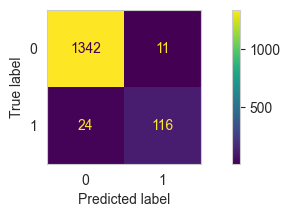

In [ ]:
### Confusion matrix for Neural Network
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_Neural_Network_7Nodes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## NN Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_Neural_Network_7Nodes),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_Neural_Network_7Nodes))

### Save result
accuracy_list_nn.append(round(metrics.accuracy_score(valid_y, prediction_Neural_Network_7Nodes),2))
recall_list_nn.append(round(metrics.recall_score(valid_y, prediction_Neural_Network_7Nodes),2))


Final Model Evaluation:
Accuracy:  0.98
Recall:  0.83
Precision:  0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1353
           1       0.91      0.83      0.87       140

    accuracy                           0.98      1493
   macro avg       0.95      0.91      0.93      1493
weighted avg       0.98      0.98      0.98      1493



#### Both models have an accuracy of 98%. The NN(4 nodes) model has higher recall (0.88 vs. 0.83), while the NN(7 nodes) has slightly better precision (0.91 vs. 0.87). Since recall is more important for capturing positive cases, we select the NN(4 nodes) model with higher recall.

### Find the best epoch count for the neural network model

Training MLPClassifier with max_iter=10
Validation Recall: 0.5214, Validation Accuracy: 0.9524
Training MLPClassifier with max_iter=50
Validation Recall: 0.8500, Validation Accuracy: 0.9772
Training MLPClassifier with max_iter=100
Validation Recall: 0.8714, Validation Accuracy: 0.9759
Training MLPClassifier with max_iter=150
Validation Recall: 0.8786, Validation Accuracy: 0.9766
Training MLPClassifier with max_iter=200
Validation Recall: 0.8786, Validation Accuracy: 0.9766
Training MLPClassifier with max_iter=250
Validation Recall: 0.8786, Validation Accuracy: 0.9766
Training MLPClassifier with max_iter=300
Validation Recall: 0.8786, Validation Accuracy: 0.9766


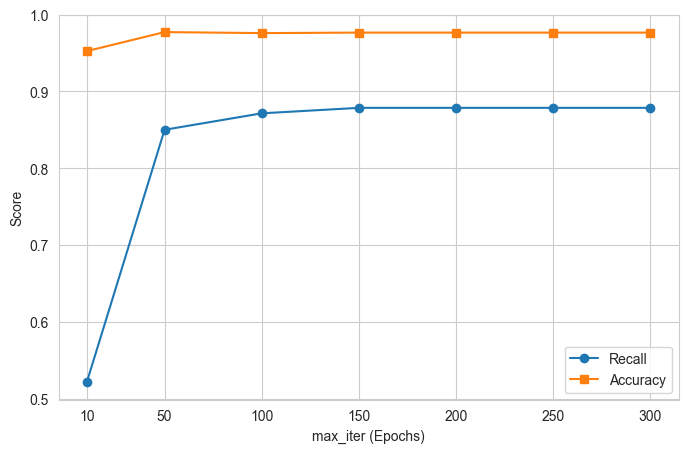

In [ ]:
epoch_options = [10,50,100,150,200,250,300]
val_recalls = []
val_accuracies = []

for epochs in epoch_options:
    print(f"Training MLPClassifier with max_iter={epochs}")
    clf = MLPClassifier(hidden_layer_sizes=(4,),
                        activation='logistic',
                        solver='lbfgs',
                        random_state=1,
                        max_iter=epochs)
    clf.fit(train_X, train_y.values)
    ## Predict Y
    prediction_NN = clf.predict(valid_X)
    recall = metrics.recall_score(valid_y, prediction_NN)
    accuracy = accuracy_score(valid_y, prediction_NN)
    val_recalls.append(recall)
    val_accuracies.append(accuracy)
    print(f"Validation Recall: {recall:.4f}, Validation Accuracy: {accuracy:.4f}")

# Plot Recall and Accuracy vs epochs
plt.figure(figsize=(8, 5))
plt.plot(epoch_options, val_recalls, marker='o', label='Recall')
plt.plot(epoch_options, val_accuracies, marker='s', label='Accuracy')
plt.xlabel('max_iter (Epochs)')
plt.ylabel('Score')
plt.xticks(epoch_options)
plt.legend()
plt.grid(True)
plt.show()

### Find the best hyperparameter using gridsearch

In [ ]:
optimizer_list = []
parameter_space = {
    'activation': ['identity','logistic', 'relu', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','invscaling','adaptive'],
}

## Applied grid_Search to find the best hyperparameter
clf = MLPClassifier(hidden_layer_sizes= (4,), max_iter = 150,random_state = 42)

grid = GridSearchCV(clf, parameter_space, cv=5, scoring='recall')
grid.fit(train_X.values, train_y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best Score: 0.8676470588235293


#### Train the model with the best parameters

In [ ]:
clf_best = MLPClassifier(solver=grid.best_params_['solver'],
                            random_state = 42,
                            alpha=grid.best_params_['alpha'],
                            learning_rate=grid.best_params_['learning_rate'],
                            activation=grid.best_params_['activation'],
                            max_iter=150,
                            hidden_layer_sizes=(4,))
clf_best.fit(train_X, train_y.values)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(4,), max_iter=150,
              random_state=42, solver='lbfgs')

#### Performace Evaluation

In [ ]:
## Predict Y
prediction_Neural_Network_best = clf_best.predict(valid_X)

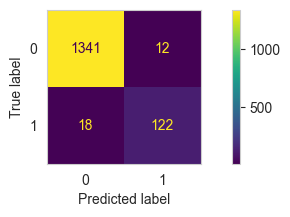

In [ ]:
### Confusion matrix for Neural Network
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_Neural_Network_best)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_Neural_Network_best),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_Neural_Network_best),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_Neural_Network_best),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_Neural_Network_best))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, prediction_Neural_Network_best),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, prediction_Neural_Network_best),2))


Final Model Evaluation:
Accuracy:  0.98
Recall:  0.87
Precision:  0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.91      0.87      0.89       140

    accuracy                           0.98      1493
   macro avg       0.95      0.93      0.94      1493
weighted avg       0.98      0.98      0.98      1493



### SVM

In [ ]:
### Implement model
kernel_scores = {}

# Evaluate each kernel
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(kernel=kernel)
    scores = cross_val_score(model, train_X, train_y, cv=5)
    mean_score = scores.mean()
    kernel_scores[kernel] = mean_score
    print(f"{kernel} kernel: Mean Accuracy = {mean_score:.4f}")

linear kernel: Mean Accuracy = 0.9446
rbf kernel: Mean Accuracy = 0.9724
poly kernel: Mean Accuracy = 0.9695
sigmoid kernel: Mean Accuracy = 0.8650


In [ ]:
### Implement with the best kernel
best_kernel = max(kernel_scores, key=kernel_scores.get)
classifier_svm = SVC(kernel=best_kernel)
classifier_svm.fit(train_X, train_y)

SVC()

#### Performace Evaluation

In [ ]:
### Implement SVM prediction
prediction_SVM = classifier_svm.predict(valid_X)

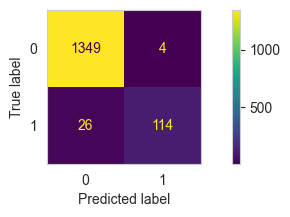

In [ ]:
### Confusion matrix for SVM
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, prediction_SVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## SVM Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, prediction_SVM),2))
print('Recall: ', round(metrics.recall_score(valid_y, prediction_SVM),2))
print('Precision: ', round(metrics.precision_score(valid_y, prediction_SVM),2))
print('\nClassification Report:\n', classification_report(valid_y, prediction_SVM))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, prediction_SVM),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, prediction_SVM),2))


Final Model Evaluation:
Accuracy:  0.98
Recall:  0.81
Precision:  0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.97      0.81      0.88       140

    accuracy                           0.98      1493
   macro avg       0.97      0.91      0.94      1493
weighted avg       0.98      0.98      0.98      1493



#### The SVM model achieves high accuracy (98%) and precision (97%), with strong performance on both classes, though recall for the positive class is slightly lower at 81%.

### Decision Tree

In [ ]:
### Finding the best max depth
def DecisionTreelassiferMultiple(max_depth,train_X, valid_X, train_y, valid_y):
    results_all = []
    for i in range(1,max_depth):
        tree_classifer = DecisionTreeClassifier(max_depth=i, random_state=42)
        tree_classifer.fit(train_X, train_y)

        y_pred_test = tree_classifer.predict(valid_X)
        Accuracy_test = round(metrics.accuracy_score(valid_y, y_pred_test),4)
        Recall_test = round(metrics.recall_score(valid_y, y_pred_test),4)
        Precision_test =  round(metrics.precision_score(valid_y, y_pred_test),4)

        Results = [i,"test",Accuracy_test,Recall_test,Precision_test]
        results_all.append(Results)
    return results_all

In [ ]:
## Implement multiple linear regression
mutitple_models = DecisionTreelassiferMultiple(20,train_X, valid_X, train_y, valid_y)

In [ ]:
## Results of multiple decision tree regression
final_result = pd.DataFrame(mutitple_models, columns = ["Max_Depth","Type","Accuracy","Recall","Precision"])
final_result

,Max_Depth,Type,Accuracy,Recall,Precision
0,1,test,0.9062,0.0000,0.0000
1,2,test,0.9612,0.7000,0.8596
2,3,test,0.9826,0.8357,0.9750
3,4,test,0.9846,0.8500,0.9835
4,5,test,0.9853,0.9071,0.9338
5,6,test,0.9846,0.9000,0.9333
6,7,test,0.9812,0.9071,0.8944
7,8,test,0.9799,0.8857,0.8986
8,9,test,0.9819,0.9000,0.9065
9,10,test,0.9812,0.9143,0.8889


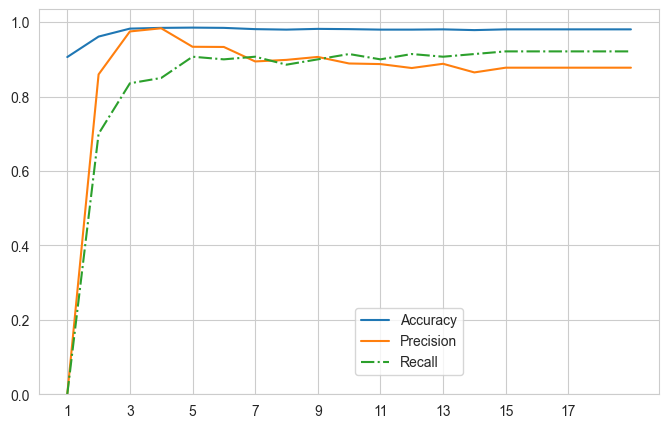

In [ ]:
# Visualize the result by line chart
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(final_result["Max_Depth"], final_result["Accuracy"], label = "Accuracy")
plt.plot(final_result["Max_Depth"], final_result["Precision"], label = "Precision",linestyle="-")
plt.plot(final_result["Max_Depth"], final_result["Recall"], label = "Recall",linestyle="-.")
plt.legend(loc=(0.51, 0.05)) ## Modify the position of legend
plt.xticks(np.arange(1, 19,2))
plt.ylim(0)
plt.show()

#### Best MAxdepth k=5

In [ ]:
### Best K is found equal to 5
classTree = DecisionTreeClassifier(random_state=0, max_depth=5)
classTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, random_state=0)

#### Performace Evaluation

In [ ]:
#Predict the response for test dataset
y_pred_DT = classTree.predict(valid_X)

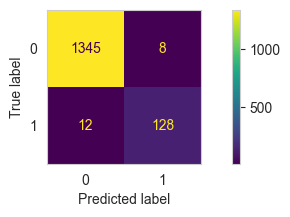

In [ ]:
### Confusion matrix for Decision Tree
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_DT)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Decision tree Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_DT),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_DT),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_DT),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_DT))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, y_pred_DT),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, y_pred_DT),2))


Final Model Evaluation:
Accuracy:  0.99
Recall:  0.91
Precision:  0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.94      0.91      0.93       140

    accuracy                           0.99      1493
   macro avg       0.97      0.95      0.96      1493
weighted avg       0.99      0.99      0.99      1493



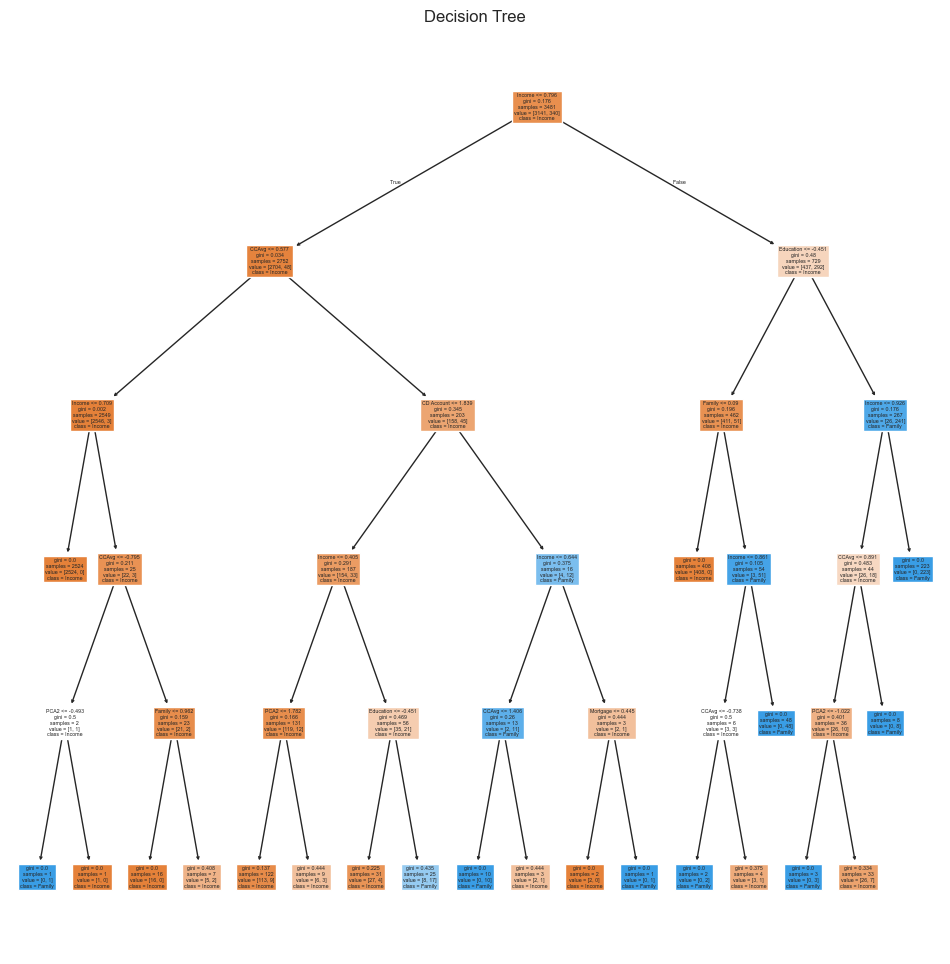

In [ ]:
## Showing Tree Structure
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(classTree,feature_names=predictors, class_names=X.columns, filled=True)
plt.title('Decision Tree')
plt.show()

#### The decision tree model achieves excellent accuracy (98%) with balanced precision (91%) and recall (93%) for the positive class, indicating strong overall performance.

### Logistic Regression

#### -with all predictors

In [ ]:
## Original models with all predictors
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -4.408434582650246
         Income    Family    CCAvg  Education  Mortgage  CD Account      PCA2
coeff  2.452623  0.780331  0.12141   1.305502  0.050639    0.574918 -0.027558

AIC -271.6414208858878


#### Performace Evaluation

In [ ]:
## Applied all_predictors model to predict
y_pred_logistics = logit_reg.predict(valid_X)

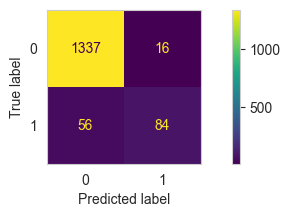

In [ ]:
### Confusion matrix for Logistic Regression full models
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_logistics)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## full Logistic Model result
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_logistics),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_logistics),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_logistics),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_logistics))


Final Model Evaluation:
Accuracy:  0.95
Recall:  0.6
Precision:  0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.84      0.60      0.70       140

    accuracy                           0.95      1493
   macro avg       0.90      0.79      0.84      1493
weighted avg       0.95      0.95      0.95      1493



#### -with gridsearch

In [ ]:
## Apply gridsearch to find the best hyperparameter for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],             # ElasticNet also works with saga solver
    'C': [0.01, 0.1, 1, 10, 100, 1e42],   # Inverse of regularization strength
    'solver': ['liblinear', 'saga']      # Solver must be compatible with penalty
}

In [ ]:
## Applied grid_Search to find the best hyperparameter
logit = LogisticRegression(max_iter=1000)

grid = GridSearchCV(logit, param_grid, cv=5, scoring='accuracy')
grid.fit(train_X_LR, train_y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9445546595425387


In [ ]:
# fit a logistic regression with new set of model and best set of hyperparameter
logit_reg_news_best = LogisticRegression(penalty="l1", C=1e42, solver='liblinear')
logit_reg_news_best.fit(train_X_LR, train_y)
print('intercept ', logit_reg_news_best.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg_news_best.coef_[0]}, index=train_X_LR.columns).transpose())
print('AIC', AIC_score(valid_y, logit_reg_news_best.predict(valid_X_LR), df = len(train_X_LR.columns) + 1))

intercept  -4.406778542215957
         Income    Family  Education  Mortgage  CD Account      PCA2
coeff  2.530505  0.780897   1.292529   0.04391    0.581497 -0.012446
AIC -294.52288015417435


#### Performace Evaluation

In [ ]:
## Applied all_predictors model to predict
y_pred_logistics_best = logit_reg_news_best.predict(valid_X_LR)

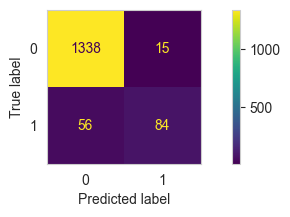

In [ ]:
### Confusion matrix for Logistic Regression full models
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_logistics_best)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Decision tree Model present
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_logistics_best),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_logistics_best),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_logistics_best),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_logistics_best))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, y_pred_logistics_best),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, y_pred_logistics_best),2))


Final Model Evaluation:
Accuracy:  0.95
Recall:  0.6
Precision:  0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.85      0.60      0.70       140

    accuracy                           0.95      1493
   macro avg       0.90      0.79      0.84      1493
weighted avg       0.95      0.95      0.95      1493



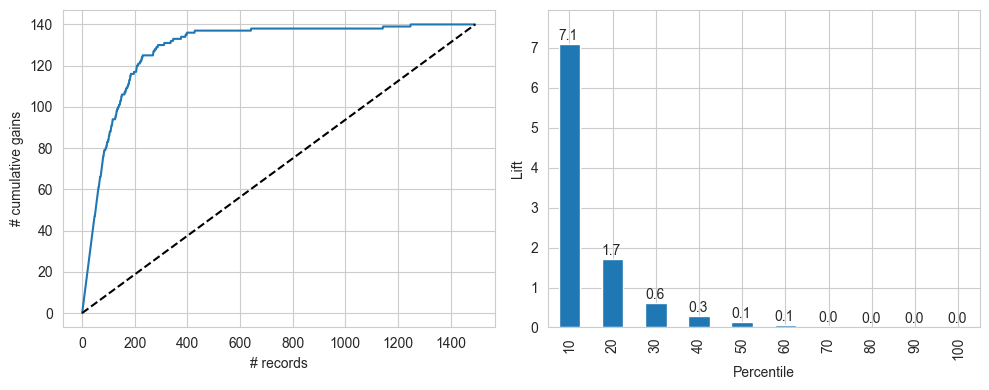

In [ ]:
logit_reg_pred = logit_reg_news_best.predict(valid_X_LR)
logit_reg_proba = logit_reg_news_best.predict_proba(valid_X_LR)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

df_logit_result = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df_logit_result.actual, ax=axes[0])
liftChart(df_logit_result['p(1)'], title=False, ax=axes[1])

plt.tight_layout()
plt.show()

#### Cumulative Gains Chart:
* The model effectively captures a high proportion of positive cases early, significantly outperforming random selection.

#### Lift Chart:
* The model achieves a high lift of 7.3 in the top 10th percentile, indicating strong predictive power in this segment.

### Naive Bayes

In [ ]:
### Normalization (scaling data to the range of 0 to 1)
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(valid_X)

In [ ]:
## Implement model
mnb_model = MultinomialNB()
mnb_model.fit(train_X_scaled, train_y)

MultinomialNB()

#### Performace Evaluation

In [ ]:
## Implement Naive Models
pred_y_NB = mnb_model.predict(test_X_scaled)
prob_y_NB = mnb_model.predict_proba(test_X_scaled)[:, 1]

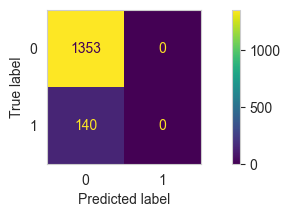

In [ ]:
## Confusion Matrix for Naive bayes
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, pred_y_NB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Naive Bayes Model results
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, pred_y_NB),2))
print('Recall: ', round(metrics.recall_score(valid_y, pred_y_NB),2))
print('Precision: ', round(metrics.precision_score(valid_y, pred_y_NB),2))
print('\nClassification Report:\n', classification_report(valid_y, pred_y_NB))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, pred_y_NB),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, pred_y_NB),2))


Final Model Evaluation:
Accuracy:  0.91
Recall:  0.0
Precision:  0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1353
           1       0.00      0.00      0.00       140

    accuracy                           0.91      1493
   macro avg       0.45      0.50      0.48      1493
weighted avg       0.82      0.91      0.86      1493



#### The Naive Bayes model achieves high accuracy (91%) due to perfect negative class predictions but has extremely low recall (0.0) for the positive class, indicating it rarely identifies positive cases.

### KNN

#### Train Test split testing

In [ ]:
# Train a classifier for different values of k
# Best k = 5
results_KNN = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results_KNN.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

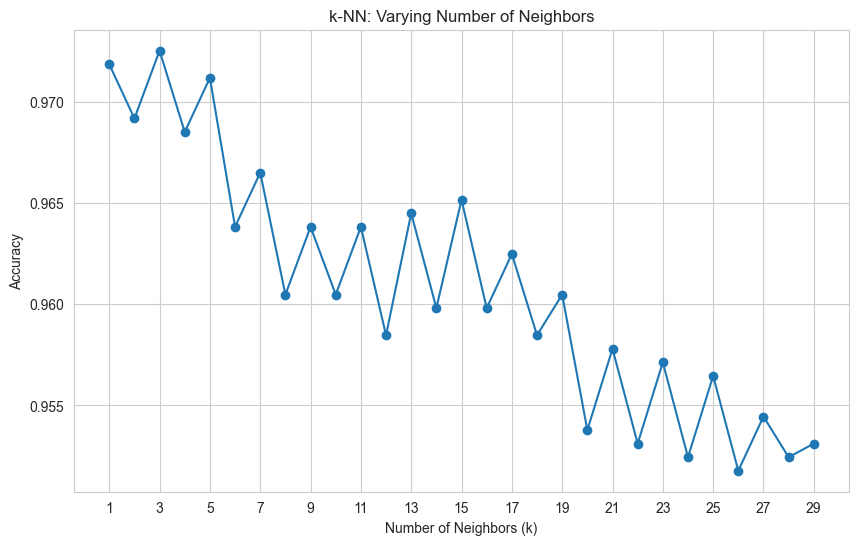

In [ ]:
# Convert results to a pandas data frame
results_KNN = pd.DataFrame(results_KNN)

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_KNN['k'], results_KNN['accuracy'], marker='o')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 30,2))
plt.grid(True)
plt.show()

#### Running models with best K

In [ ]:
# Select k = 5 due to its high accuracy
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(train_X, train_y)

KNeighborsClassifier()

#### Performace Evaluation

In [ ]:
## Apply the best model to predict X
y_pred_KNN = knn_best.predict(valid_X)

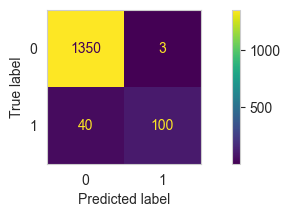

In [ ]:
## Confusion Matrix for Naive bayes
plt.rcParams["figure.figsize"] = (8, 2)
confusion_matrix = metrics.confusion_matrix(valid_y, y_pred_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.grid(None)

In [ ]:
## Naive Bayes Model results
print('\nFinal Model Evaluation:')
print('Accuracy: ', round(metrics.accuracy_score(valid_y, y_pred_KNN),2))
print('Recall: ', round(metrics.recall_score(valid_y, y_pred_KNN),2))
print('Precision: ', round(metrics.precision_score(valid_y, y_pred_KNN),2))
print('\nClassification Report:\n', classification_report(valid_y, y_pred_KNN))

### Save result
accuracy_list_normalize.append(round(metrics.accuracy_score(valid_y, y_pred_KNN),2))
recall_list_normalize.append(round(metrics.recall_score(valid_y, y_pred_KNN),2))


Final Model Evaluation:
Accuracy:  0.97
Recall:  0.71
Precision:  0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1353
           1       0.97      0.71      0.82       140

    accuracy                           0.97      1493
   macro avg       0.97      0.86      0.90      1493
weighted avg       0.97      0.97      0.97      1493



#### The KNN model achieves high accuracy (95%) and precision (93%), but recall for the positive class is moderate at 54%, indicating room for improvement in identifying positive cases.

# Conclusion and Comparison

In [ ]:
# Colors for each bar, highlighting the third one
colors = ['red', 'blue', 'blue', 'blue', 'blue','blue','blue']

### Not Normalized data results

In [ ]:
### Make a dataframe of results
methods_list = ['Neural Network','SVM','Decision Tree','Logistic Regression','Naive Bayes','KNN']
data = {"Methods":methods_list,"Recall":recall_list,'Accuracy':accuracy_list}
df_all_results = pd.DataFrame(data)
df_all_results

,Methods,Recall,Accuracy
0,Neural Network,0.63,0.95
1,SVM,0.58,0.96
2,Decision Tree,0.93,0.98
3,Logistic Regression,0.60,0.95
4,Naive Bayes,0.00,0.91
5,KNN,0.50,0.93


Text(0.5, 0.98, '')

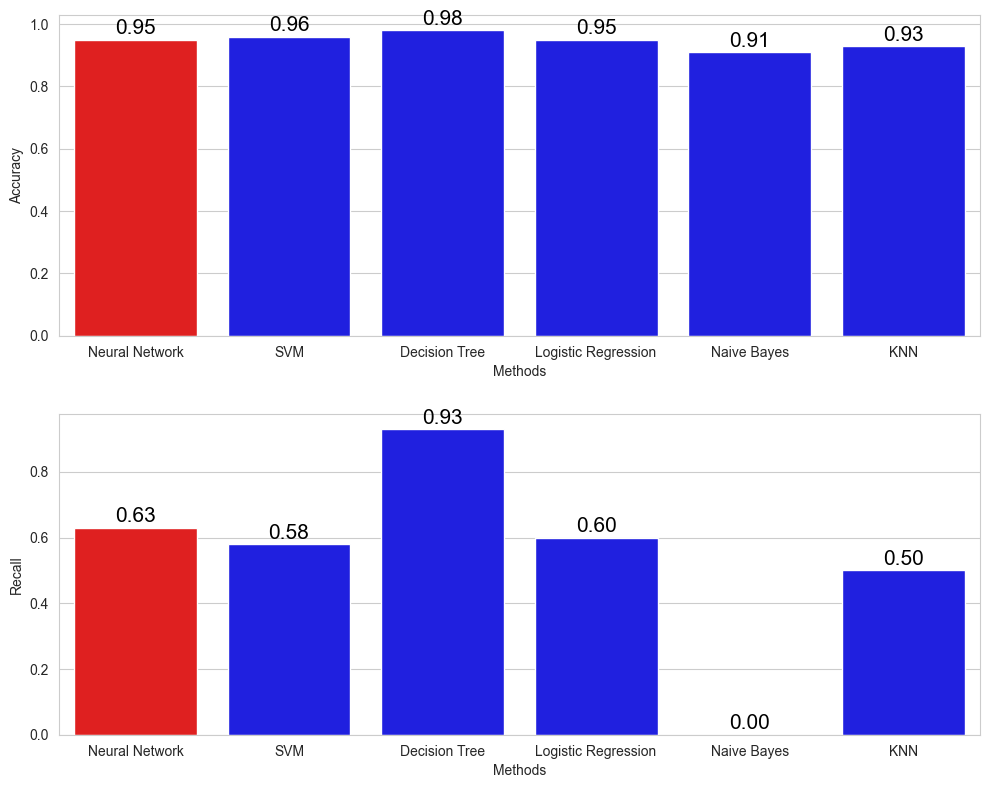

In [ ]:
### Comparison Accuracy and Recall between models
## Visualize data distribution
# matplotlib Version
plt.rcParams["figure.figsize"] = (10, 8)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 1)
sns.barplot(x='Methods',y='Accuracy',palette=colors,data=df_all_results,ax=axes[0])
sns.barplot(x='Methods',y='Recall',palette=colors,data=df_all_results,ax=axes[1])

# Add labels to bars
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=15, color='black', xytext=(0, 1),
                    textcoords='offset points')

# Layout adjustment
plt.tight_layout(h_pad=2)  # More vertical space between plots
plt.suptitle('') # Suppress the overall title


#### Accuracy:
* Decision Tree has the highest accuracy, suggesting it makes the fewest errors overall.
* Naive Bayes has the lowest accuracy, indicating room for improvement.

#### Recall:
* Decision Tree also excels in recall, meaning it effectively identifies true positive cases.
* Naive Bayes scores zero in recall, implying it fails to identify positive cases.

#### Neural Network Performance:
* Accuracy: The Neural Network shows a strong accuracy of 0.95, indicating it is quite effective in making correct predictions overall.
* Recall: It has a lower recall at 0.63, which means it may miss identifying some positive instances.

While the Neural Network is generally accurate, improving recall would help in better recognizing true positives, potentially improving its effectiveness for the intended task. Adjustments like data normalization, tweaking hyperparameters, or changing the model architecture could potentially enhance performance.

### Normalized data results

In [ ]:
### Make a dataframe of results
methods_list = ['Neural Network','SVM','Decision Tree','Logistic Regression','Naive Bayes','KNN']
data = {"Methods":methods_list,"Recall":recall_list_normalize,'Accuracy':accuracy_list_normalize}
df_all_results = pd.DataFrame(data)
df_all_results

,Methods,Recall,Accuracy
0,Neural Network,0.87,0.98
1,SVM,0.81,0.98
2,Decision Tree,0.91,0.99
3,Logistic Regression,0.60,0.95
4,Naive Bayes,0.00,0.91
5,KNN,0.71,0.97


Text(0.5, 0.98, '')

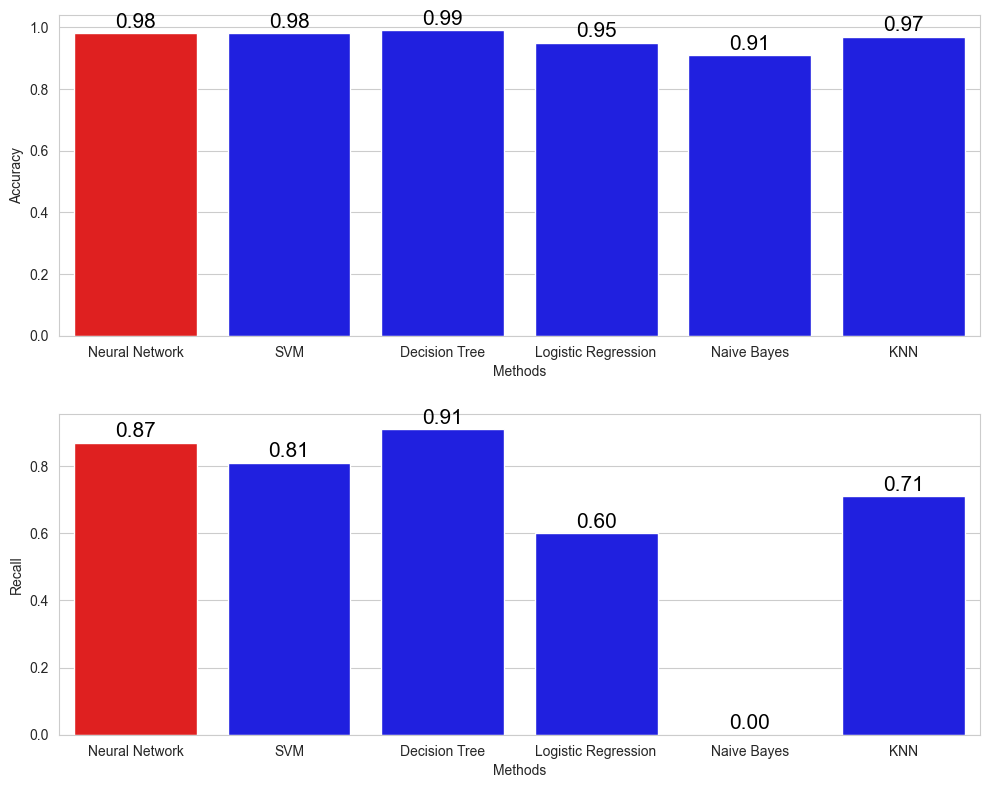

In [ ]:
### Comparison Accuracy and Recall between models
## Visualize data distribution
# matplotlib Version
plt.rcParams["figure.figsize"] = (10, 8)
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 1)
sns.barplot(x='Methods',y='Accuracy',palette=colors,data=df_all_results,ax=axes[0])
sns.barplot(x='Methods',y='Recall',palette=colors,data=df_all_results,ax=axes[1])

# Add labels to bars
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=15, color='black', xytext=(0, 1),
                    textcoords='offset points')

# Layout adjustment
plt.tight_layout(h_pad=2)  # More vertical space between plots
plt.suptitle('') # Suppress the overall title


#### Accuracy:
* Decision Tree has the highest accuracy at 0.99, indicating strong prediction capability.
* Naive Bayes has the lowest accuracy at 0.91.

#### Recall:
* Decision Tree excels in recall at 0.91, effectively identifying true positives.
* Naive Bayes scores zero in recall, meaning it fails to identify positive cases.

#### Neural Network Performance:
* Accuracy: The Neural Network shows strong accuracy of 0.98, reflecting reliable overall predictions.
* Recall: It has a high recall at 0.87, effectively identifying positive instances.

The Neural Network demonstrates robust performance, balancing both precision and comprehensive identification of potential loan approvals, making it well-suited for predicting bank personal loan approvals.

### Conclusion for Predicting Bank Personal Loan 
#### Best Model: 
* The Decision Tree model consistently outperforms others, achieving the highest accuracy (98%) and recall (93%) in both standardized and unstandardized settings. This makes it the most reliable choice for predicting bank personal loan approvals, effectively identifying both positive and negative cases.

#### Neural Network: 
* Shows significant improvement with standardization, achieving strong accuracy and enhanced recall, offering a well-balanced prediction performance.

#### Recommendations:
* Standardize Data: Continue to apply standardization to maintain high performance and consistency.
* Tune Neural Networks: Further adjustments could enhance recall, optimizing the model’s capability for accurate loan predictions.